In [119]:
import sys
sys.path.append('../../')

from IPython.core.display import display
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [120]:
# settings
CMAP = 'viridis'
dim = 4

In [121]:
# import node embeddings
df = pd.read_csv(
    f"./data/facebook_alpha-0.1_beta-0.1_ws-10_neg-5_lr-0.025_icom-36_ind-36_ds-0.0_d-{dim}_type-BGMM_k-10.txt",
    sep="\t| ",
    header=None
)
df = df.rename(columns={0: 'node'})
df.set_index(['node'], inplace=True)

/Users/anton/miniconda3/envs/MT/lib/python3.6/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


In [122]:
# import train
train = pd.read_csv("./data/facebook_train.csv", index_col=0)
train

,u,v
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


In [123]:
# import predicted labels
labels = np.genfromtxt(f"./data/labels_pred_BGMM_d{dim}_k10.txt")
labels

array([8., 8., 8., ..., 9., 9., 9.])

In [124]:
df['label'] = labels

In [125]:
display(df)
display(df.describe())

,1,2,3,4,label
node,,,,,
0,-5.791565,-2.125865,-0.705079,4.920946,8.0
1,-4.867615,-1.492043,-0.698155,3.644008,8.0
2,-3.793840,-1.553433,-0.527849,4.136863,8.0
3,-5.121711,-1.415780,-0.662337,3.322037,8.0
4,-3.916894,-1.559996,-0.560903,4.014780,8.0
...,...,...,...,...,...
4033,1.674570,5.701869,1.851378,1.805836,9.0
4034,1.487203,4.931373,1.590716,1.594958,9.0
4036,1.505473,4.805030,1.561282,1.575688,9.0


,1,2,3,4,label
count,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000
mean,-1.203034,0.838945,1.831198,1.236076,3.589304
std,3.005514,2.817995,2.120366,2.794049,2.519136
min,-8.352823,-5.690406,-2.694330,-4.385391,0.000000
25%,-3.310163,-1.085476,0.399157,-0.479998,2.000000
50%,-0.766376,0.929176,1.941858,1.598302,3.000000
75%,0.856466,3.045442,3.527953,3.122448,5.000000
max,4.269142,10.501018,6.011499,7.314298,9.000000


In [126]:
# get nx train graph
G = nx.from_pandas_edgelist(train, "u", "v")

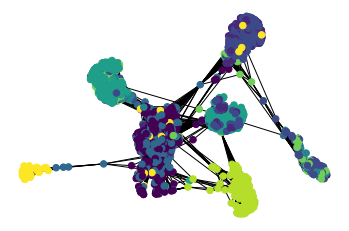

In [127]:
# plot spring graph
plt.axis("off")
nx.draw_networkx(G,
                 node_color=df.label,
                 cmap=plt.get_cmap(CMAP),
                 with_labels=False,
                 node_size=42)
plt.savefig(f"./plots/graph_d{dim}.png")


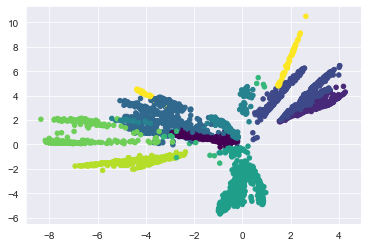

In [128]:
# plot embedding
plt.scatter(df[1], df[2], 20, c=df.label, marker="o", cmap=CMAP)
plt.savefig(f"./plots/node_emb_d{dim}.png")